Check din-nucleotide periodicity for each partitions

In [1]:
# python modules
import sys
import copy
import re
import random
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}

In [5]:
def select_best (periods, amplts, min_period, max_period):
    amplt_idx = []
    for i in range(len(periods)):
        period = periods[i]
        amplt = amplts[i]
        if period < min_period:
            continue
        elif period > max_period:
            continue
        amplt_idx.append((amplt, i))
    return sorted(amplt_idx, reverse=True)[0][1]

In [6]:
### load gtab files
gtab_path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'

dinfo_dkey = {'H1_NCP_sp_1rep_deep_chr1_score_table.gtab.gz':
              {'Sequence': 'seq'}
              }

dkey_ID_value = load_file.read_gtab_batch (dinfo_dkey,
                                           data_path=gtab_path)

loading H1_NCP_sp_1rep_deep_chr1_score_table.gtab.gz


Done


In [7]:
### set target for analysis
ID_seq = dkey_ID_value['seq']
del dkey_ID_value

In [8]:
### compute dinucleotide frequencies over positions (1st order Markov model)
NCPlen = 147
seq_list = []
for ID in ID_seq:
    seq = ID_seq[ID].upper()
    if 'N' in seq:
        continue
    if 'M' in seq:
        continue
    dyad = len(seq)/2
    for i in range(-1,2):
        NCPseq = seq[dyad+i-NCPlen/2:dyad+i+NCPlen/2+1]
        seq_list.append(NCPseq)
        seq_list.append(statis.rev_comp(NCPseq))

freq, sample_num, mean, std, stdz_freq = statis.stat_Markov(seq_list,
                                                            NCPlen,
                                                            1)

In [9]:
### compute AT/GC-rich dinucleotide periodicity [Extended Data Fig.2e]
AT_sig, GC_sig = statis.get_ATGC_sig(freq)

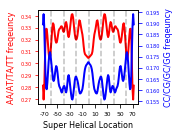

In [10]:
### plot AT/GC-rich dinucleotide periodicity
#color_list = np.linspace(0.2, 1, num=p_num)
#cmap1 = mpl.cm.get_cmap("OrRd")
#cmap2 = mpl.cm.get_cmap("GnBu")

graphics.plot_ATGC_periodicity (AT_sig,
                                GC_sig,
                                save_path='./data/',
                                save=True,
                                note='H1_NCP_sp')
